In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

from mpl_toolkits.mplot3d import Axes3D

In [2]:
all_files = glob.glob("data" + "/*.csv")

In [3]:
datasets = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=False, header=0, sep=';')
    datasets.append(df)

In [4]:
datasets[0]

,timestamp,gameobject_name,pos_x,pos_y,pos_z,euler_x,euler_y,euler_z
0,1571991350541,StartMarker,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,1571991350542,PortalCameraRig,-1.013055,5.825432,-0.796685,0.000000,0.00000,0.000000
2,1571991350549,LeftEyeAnchor,-1.013072,1.775601,-0.846427,2.559896,242.50020,354.451300
3,1571991350549,PortalCameraRig,-1.013055,5.825432,-0.796685,0.000000,0.00000,0.000000
4,1571991350560,LeftEyeAnchor,-1.012681,1.775974,-0.846386,2.524736,242.52290,354.406500
5,1571991350560,PortalCameraRig,-1.013072,5.825602,-0.796427,0.000000,0.00000,0.000000
6,1571991350574,LeftEyeAnchor,-1.012642,1.776055,-0.846314,2.482661,242.57930,354.366900
7,1571991350574,PortalCameraRig,-1.012681,5.825974,-0.796386,0.000000,0.00000,0.000000
8,1571991350588,LeftEyeAnchor,-1.012555,1.776183,-0.846141,2.467127,242.61400,354.342000
9,1571991350588,PortalCameraRig,-1.012681,5.825974,-0.796386,0.000000,0.00000,0.000000


In [5]:
df = pd.concat(datasets).reset_index(drop=True)

In [6]:
df

,timestamp,gameobject_name,pos_x,pos_y,pos_z,euler_x,euler_y,euler_z
0,1571991350541,StartMarker,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,1571991350542,PortalCameraRig,-1.013055,5.825432,-0.796685,0.000000,0.00000,0.000000
2,1571991350549,LeftEyeAnchor,-1.013072,1.775601,-0.846427,2.559896,242.50020,354.451300
3,1571991350549,PortalCameraRig,-1.013055,5.825432,-0.796685,0.000000,0.00000,0.000000
4,1571991350560,LeftEyeAnchor,-1.012681,1.775974,-0.846386,2.524736,242.52290,354.406500
5,1571991350560,PortalCameraRig,-1.013072,5.825602,-0.796427,0.000000,0.00000,0.000000
6,1571991350574,LeftEyeAnchor,-1.012642,1.776055,-0.846314,2.482661,242.57930,354.366900
7,1571991350574,PortalCameraRig,-1.012681,5.825974,-0.796386,0.000000,0.00000,0.000000
8,1571991350588,LeftEyeAnchor,-1.012555,1.776183,-0.846141,2.467127,242.61400,354.342000
9,1571991350588,PortalCameraRig,-1.012681,5.825974,-0.796386,0.000000,0.00000,0.000000


In [7]:
datasets_player = []
datasets_constants = []
for i, row in df.iterrows():
    if row['gameobject_name'] == 'LeftEyeAnchor':
        datasets_player.append(row)
    else:
        datasets_constants.append(row)

In [8]:
df_player = pd.DataFrame(datasets_player)
df_constants = pd.DataFrame(datasets_constants)

In [9]:
df_player

,timestamp,gameobject_name,pos_x,pos_y,pos_z,euler_x,euler_y,euler_z
2,1571991350549,LeftEyeAnchor,-1.013072,1.775601,-0.846427,2.559896,242.50020,354.451300
4,1571991350560,LeftEyeAnchor,-1.012681,1.775974,-0.846386,2.524736,242.52290,354.406500
6,1571991350574,LeftEyeAnchor,-1.012642,1.776055,-0.846314,2.482661,242.57930,354.366900
8,1571991350588,LeftEyeAnchor,-1.012555,1.776183,-0.846141,2.467127,242.61400,354.342000
10,1571991350604,LeftEyeAnchor,-1.012500,1.776203,-0.846070,2.433529,242.65360,354.301400
12,1571991350617,LeftEyeAnchor,-1.012390,1.776298,-0.845986,2.424727,242.70000,354.251000
14,1571991350633,LeftEyeAnchor,-1.012355,1.776330,-0.845971,2.435712,242.72340,354.196600
16,1571991350644,LeftEyeAnchor,-1.012257,1.776245,-0.845954,2.459680,242.74010,354.165200
18,1571991350658,LeftEyeAnchor,-1.012136,1.776190,-0.846015,2.501379,242.76460,354.157300
20,1571991350672,LeftEyeAnchor,-1.012097,1.776108,-0.846041,2.527226,242.76260,354.166000


(-1, 3)

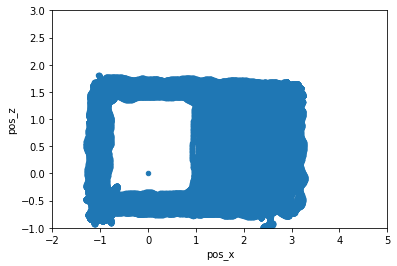

In [10]:
ax1 = df_player.plot.scatter(x='pos_x',
                     y='pos_z')

#set axes limits
ax1.set_xlim([-2,5])
ax1.set_ylim([-1,3])

In [11]:
df_constants

,timestamp,gameobject_name,pos_x,pos_y,pos_z,euler_x,euler_y,euler_z
0,1571991350541,StartMarker,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1571991350542,PortalCameraRig,-1.013055,5.825432,-0.796685,0.0,0.0,0.0
3,1571991350549,PortalCameraRig,-1.013055,5.825432,-0.796685,0.0,0.0,0.0
5,1571991350560,PortalCameraRig,-1.013072,5.825602,-0.796427,0.0,0.0,0.0
7,1571991350574,PortalCameraRig,-1.012681,5.825974,-0.796386,0.0,0.0,0.0
9,1571991350588,PortalCameraRig,-1.012681,5.825974,-0.796386,0.0,0.0,0.0
11,1571991350604,PortalCameraRig,-1.012555,5.826183,-0.796141,0.0,0.0,0.0
13,1571991350618,PortalCameraRig,-1.012500,5.826203,-0.796070,0.0,0.0,0.0
15,1571991350633,PortalCameraRig,-1.012390,5.826298,-0.795986,0.0,0.0,0.0
17,1571991350644,PortalCameraRig,-1.012390,5.826298,-0.795986,0.0,0.0,0.0
